In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the Washington State Department of Ecology

The Washington State Department of Ecology provides data through their Environmential Information Managment (EIM) System.

We were interested in data from a well site with location id: APK309

Using the search tools here: [https://apps.ecology.wa.gov/eim/search/Eim/EIMSearch.aspx](https://apps.ecology.wa.gov/eim/search/Eim/EIMSearch.aspx)

We can find the site information, and request to download the avilable data. Once the request is process, the data is provided via email, with a link to a .zip file containing the relavant data.

For the code below, the contents of that .zip file were placed in a directory named `EIM-data-APK309`, a subdirectory of `data`, located in the same directory as this notebook.

# This notebook

The code below loads the timeseries data provided for this site into a dataframe. Some light cleaning is done and the result is a dataframe that contains the following information for this well:
- `meas_time` : The date and time at which the measurment was recorded
- `water_elevation` : Calculated water level elevation, relative to NAVD88F, in feet
- `water_depth`: Calculated water level depth, below land surface, in feet

#### Loading the data

In [3]:
data = pd.read_csv('../data/raw_data/EIM-data-APK309/GroundwaterTimeSeriesResults_2023Oct19_96705.csv',
                   low_memory=False)

#### Formatting dates as datetimes

In [4]:
data['Field_Collection_Date'] = pd.to_datetime(data['Field_Collection_Date'])
data['Field_Collection_Date_Time'] = pd.to_datetime(data['Field_Collection_Date_Time'], format='mixed')
data['Record_Created_On'] = pd.to_datetime(data['Record_Created_On'])

#### Checking out which columns have usefull data

In [5]:
data.nunique()

Study_ID                                                  1
Study_Name                                                1
Location_ID                                               1
Study_Specific_Location_ID                                1
Location_Name                                             1
Well_Tag_ID                                               1
Instrument_ID                                             1
Field_Collection_Type                                     1
Field_Collector                                           1
Time_Zone                                                 1
Field_Collection_Date                                  4032
Field_Collection_Time                                    24
Field_Collection_Date_Time                            96705
Field_Collection_Reference_Point                          0
Field_Collection_Upper_Depth                              0
Field_Collection_Lower_Depth                              0
Field_Collection_Depth_Units            

It looks like the columns we might care about are:
- `Field_Collection_Date_Time`
- `Calculated_Water_Level_Elevation_NAVD88_FT`
- `Calculated_Water_Level_Depth_Below_Land_Surface_FT`

Here, we put those in a dataframe, and rename the columns so that they are a little easier to work with.

In [6]:
df = data[['Field_Collection_Date_Time',
               'Calculated_Water_Level_Elevation_NAVD88_FT',
               'Calculated_Water_Level_Depth_Below_Land_Surface_FT']].copy()

short_names={'Field_Collection_Date_Time':'meas_time',
                 'Calculated_Water_Level_Elevation_NAVD88_FT':'water_elevation',
                 'Calculated_Water_Level_Depth_Below_Land_Surface_FT':'water_depth'}

df = df.rename(columns=short_names)

The data wasn't sorted by meaurment time to start with, so we'll do that now.

In [7]:
df = df.sort_values('meas_time')

There were also two depth measurments (out of 96705) that appear to be extreme outliers. So, we will drop those now.

In [8]:
df = df.drop(df.loc[df.water_depth>55].index)

#### Here's a simple plot to visualize the data

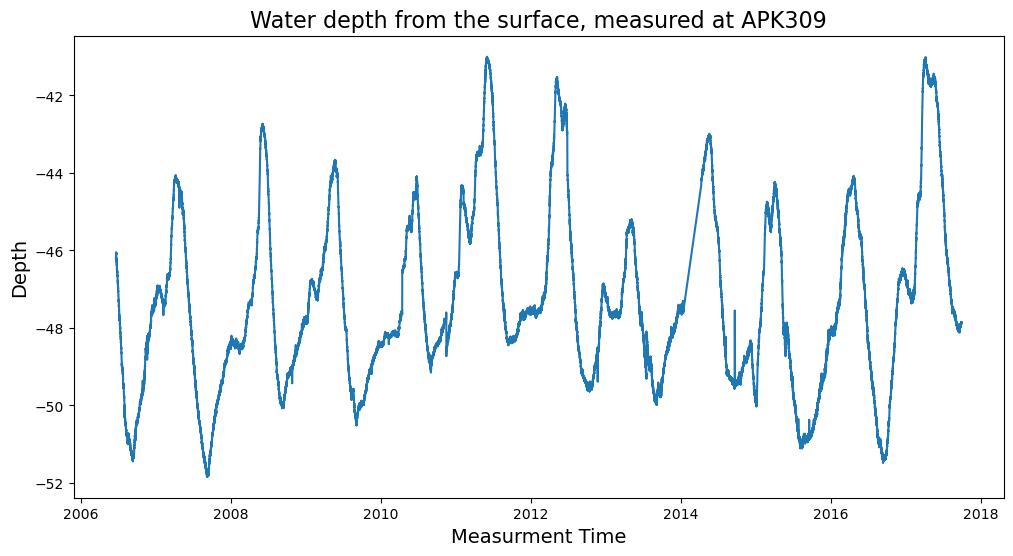

In [9]:
measurment_times = df.meas_time.values
water_depths = df.water_depth.values*-1

plt.figure(figsize=(12,6))
plt.title('Water depth from the surface, measured at APK309', fontsize=16)

plt.plot(measurment_times, water_depths)

plt.xlabel('Measurment Time', fontsize=14)
plt.ylabel('Depth', fontsize=14)

plt.show()

In [10]:
df.head(10)

,meas_time,water_elevation,water_depth
43120,2006-06-21 12:00:00,1923.99,46.20
43121,2006-06-21 13:00:00,1924.00,46.19
43122,2006-06-21 14:00:00,1923.99,46.20
43123,2006-06-21 15:00:00,1924.00,46.19
43124,2006-06-21 16:00:00,1924.02,46.17
43125,2006-06-21 17:00:00,1924.01,46.18
43126,2006-06-21 18:00:00,1924.03,46.16
43127,2006-06-21 19:00:00,1924.04,46.15
43128,2006-06-21 20:00:00,1924.03,46.16
43129,2006-06-21 21:00:00,1924.05,46.14
